In [1]:
import pandas as pd 
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
df=pd.read_csv("../resources/Excel_sheets/Churn_Modelling.csv")
df.sample(4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2032,2033,15658716,Banks,667,Germany,Female,37,5,92171.35,3,1,0,178106.34,1
2763,2764,15654495,Potter,706,Germany,Female,47,6,120621.89,1,1,1,140803.70,0
1254,1255,15610383,Dumetolisa,628,France,Female,46,1,46870.43,4,1,0,31272.14,1
856,857,15693864,Iheanacho,567,Germany,Female,49,5,134956.02,1,1,0,93953.84,1


In [11]:
df.Surname.nunique(),df.shape[0]

(2932, 10000)

In [20]:
df_names=df[["Surname","Gender"]].copy()
df_names

,Surname,Gender
0,Hargrave,Female
1,Hill,Female
2,Onio,Female
3,Boni,Female
4,Mitchell,Female
...,...,...
9995,Obijiaku,Male
9996,Johnstone,Male
9997,Liu,Female
9998,Sabbatini,Male


In [21]:
df.isna().sum().sort_values(ascending=False)

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [22]:
df_names.Surname=df_names.Surname.apply(lambda x: np.nan if len(x)<3 else x)

In [23]:
df_names.isna().sum()

Surname    296
Gender       0
dtype: int64

In [24]:
df_names.dropna(inplace=True)

In [28]:
df_names.Surname.nunique()

2913

In [29]:
df_names.shape

(9704, 2)

In [33]:
df_names[df_names.duplicated()].sample(4)

,Surname,Gender
9815,Chinonyelum,Male
1438,Norman,Male
8942,Azuka,Female
3170,Chikezie,Female


In [34]:
df_names.drop_duplicates(inplace=True)

In [37]:
df_names[df_names.Surname.duplicated()]

,Surname,Gender
102,Hung,Male
122,Cameron,Female
128,Kennedy,Female
158,Maclean,Female
184,Cocci,Female
...,...,...
9905,Emenike,Male
9906,Pugh,Female
9912,Michael,Female
9929,Artamonova,Male


In [40]:
df_names[df_names.Surname=="Kennedy"]

,Surname,Gender
121,Kennedy,Male
128,Kennedy,Female


In [41]:
df_names.drop_duplicates(["Surname"],keep=False,inplace=True)

In [42]:
df_names.shape

(1826, 2)

In [44]:
df_names.to_csv("../resources/Excel_sheets/bank_customer_names.csv",index=False)

In [51]:
df1=df.drop(["RowNumber","CustomerId","Surname"],axis=1)
df1.Gender.replace({"Male":1,"Female":0},inplace=True)
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [46]:
df1.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [50]:
df1.Gender.unique()

array(['Female', 1], dtype=object)

In [56]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Geography', ylabel='count'>

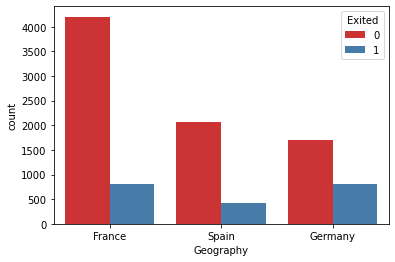

In [53]:
sns.countplot(x='Geography',hue='Exited',palette='Set1',data=df1)

<AxesSubplot:>

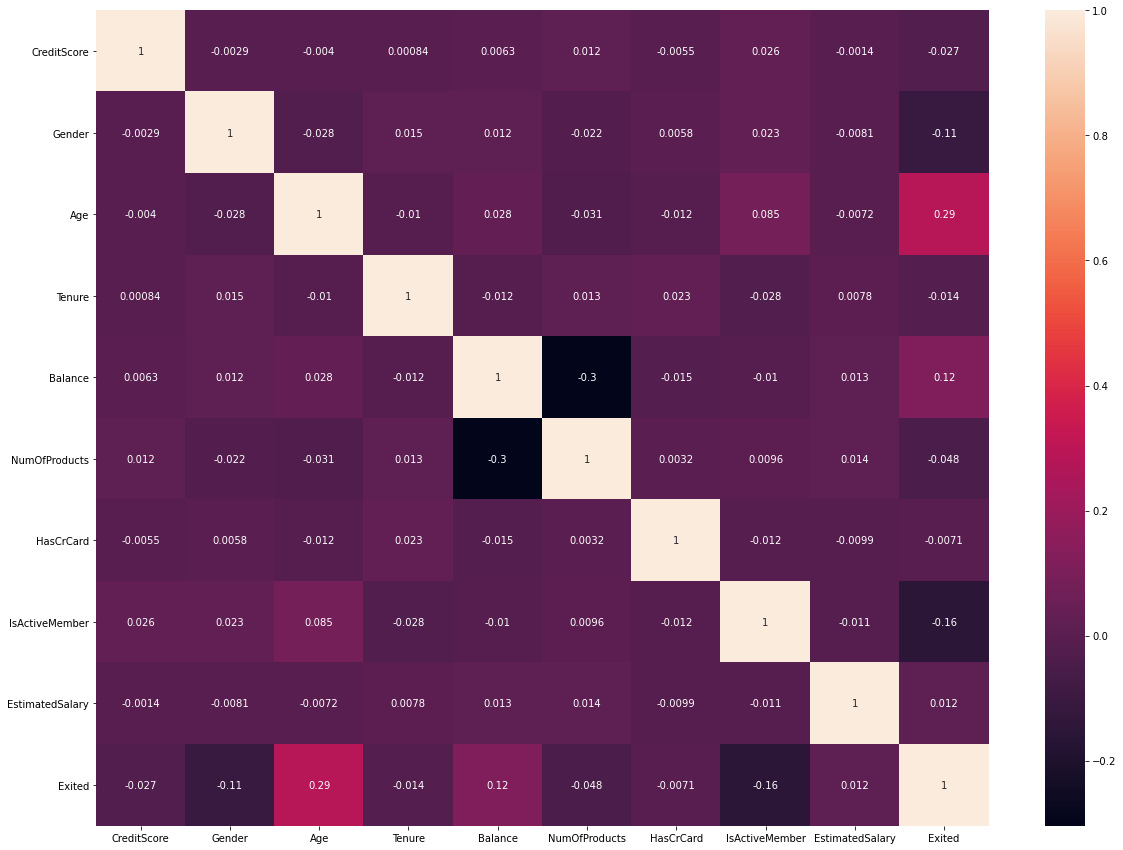

In [57]:
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(),annot=True)

<AxesSubplot:xlabel='Gender', ylabel='count'>

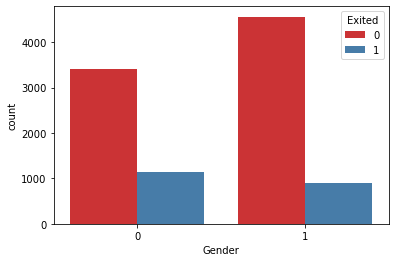

In [58]:
sns.countplot(x='Gender',hue='Exited',palette='Set1',data=df1)

<AxesSubplot:xlabel='CreditScore', ylabel='Count'>

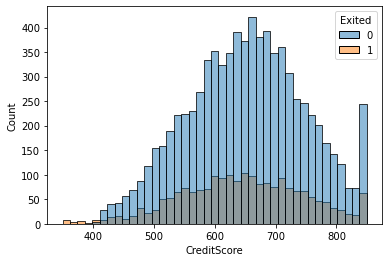

In [69]:
sns.histplot(data=df1,x='CreditScore',hue='Exited')

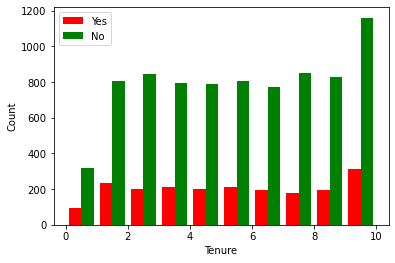

In [80]:
def draw1():
    tenure_churn_no=df1[df1.Exited==0].Tenure
    tenure_churn_yes=df1[df1.Exited==1].Tenure

    plt.hist([tenure_churn_yes,tenure_churn_no],color=["red","green"],label=["Yes","No"])
    plt.xlabel("Tenure")
    plt.ylabel("Count")
    plt.legend()
    plt.show()
    
draw1()

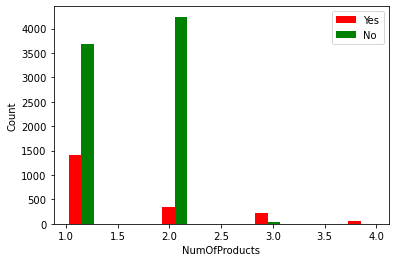

In [117]:
def draw2():
    x1=df1[df1.Exited==1].NumOfProducts
    x2=df1[df1.Exited==0].NumOfProducts

    plt.hist([x1,x2],color=["red","green"],label=["Yes","No"])
    plt.xlabel("NumOfProducts")
    plt.ylabel("Count")
    plt.legend()
    plt.show()
    
draw2()

<AxesSubplot:xlabel='Age', ylabel='Count'>

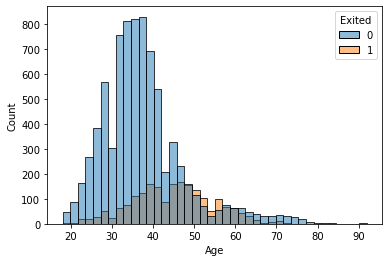

In [120]:
sns.histplot(data=df1,x='Age',hue='Exited',bins=40)

In [59]:
processed_df=pd.get_dummies(df1,drop_first=True,columns=['Geography'])
processed_df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [60]:
from sklearn.preprocessing import MinMaxScaler

In [122]:
cols_to_scale=["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]
scaler=MinMaxScaler()
processed_df[cols_to_scale]=scaler.fit_transform(processed_df[cols_to_scale])
processed_df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,1


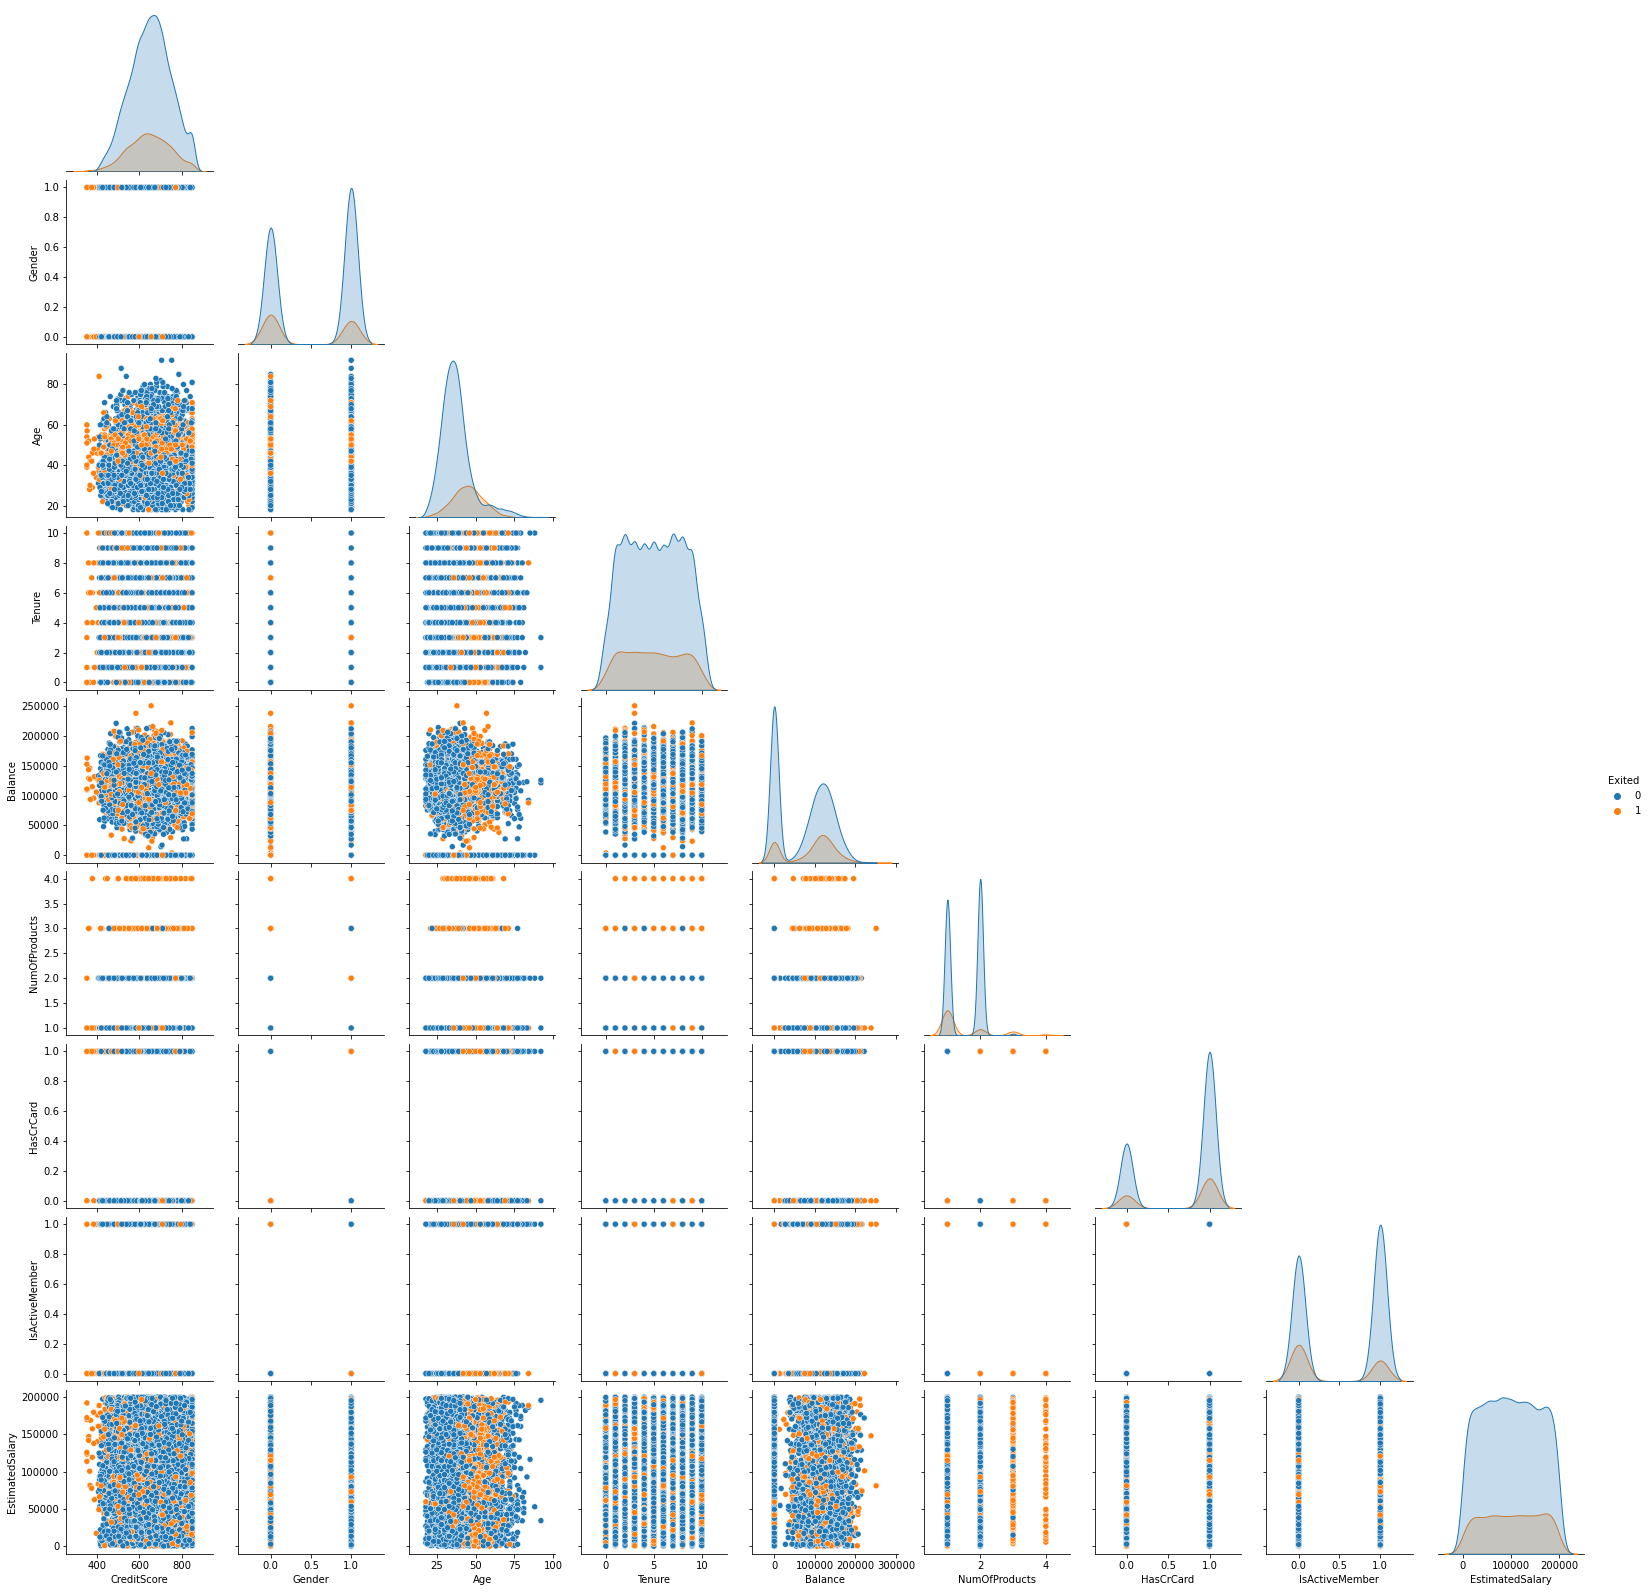

In [68]:
sns.pairplot(df1,hue="Exited",corner=True)

In [123]:
def ANN(X,y,epoch=50,test_size=.2):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5,stratify=y)
    
    model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(X_train.shape[1],),activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
    ])
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    model.fit(X_train,y_train,epochs=epoch)
    
    print(classification_report(y_test,np.round(model.predict(X_test))))
    
ANN(processed_df.drop("Exited",axis=1),processed_df["Exited"])

Epoch 1/50
250/250 [==============================] - 4s 3ms/step - loss: 0.5181 - accuracy: 0.7868
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4719 - accuracy: 0.7962
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4589 - accuracy: 0.7999
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4436 - accuracy: 0.8100
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4326 - accuracy: 0.8152
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4271 - accuracy: 0.8191
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4235 - accuracy: 0.8185
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4207 - accuracy: 0.8215
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4180 - accuracy: 0.8236
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4145 - accuracy: 0.8250

In [125]:
distribution=df1.Exited.value_counts()
distribution

0    7963
1    2037
Name: Exited, dtype: int64

In [126]:
exited_0=processed_df[processed_df.Exited==0]
exited_1=processed_df[processed_df.Exited==1]

### UNDERSAMPLING

In [128]:
df_0_under=exited_0.sample(distribution[1])
merged_under=pd.concat([exited_1,df_0_under],axis=0)
ANN(merged_under.drop("Exited",axis=1),merged_under["Exited"])

Epoch 1/50
102/102 [==============================] - 2s 2ms/step - loss: 0.6788 - accuracy: 0.5750
Epoch 2/50
102/102 [==============================] - 0s 2ms/step - loss: 0.6501 - accuracy: 0.6299
Epoch 3/50
102/102 [==============================] - 0s 2ms/step - loss: 0.6321 - accuracy: 0.6484
Epoch 4/50
102/102 [==============================] - 0s 2ms/step - loss: 0.6193 - accuracy: 0.6569
Epoch 5/50
102/102 [==============================] - 0s 2ms/step - loss: 0.6042 - accuracy: 0.6747
Epoch 6/50
102/102 [==============================] - 0s 2ms/step - loss: 0.5904 - accuracy: 0.6922
Epoch 7/50
102/102 [==============================] - 0s 2ms/step - loss: 0.5763 - accuracy: 0.7060
Epoch 8/50
102/102 [==============================] - 0s 2ms/step - loss: 0.5624 - accuracy: 0.7156
Epoch 9/50
102/102 [==============================] - 0s 3ms/step - loss: 0.5480 - accuracy: 0.7272
Epoch 10/50
102/102 [==============================] - 0s 3ms/step - loss: 0.5334 - accuracy: 0.7386

### OVERSAMPLING

In [131]:
df_1_over=exited_1.sample(distribution[0],replace=True)
merged_over=pd.concat([exited_0,df_1_over],axis=0)
ANN(merged_over.drop("Exited",axis=1),merged_over["Exited"])

Epoch 1/50
399/399 [==============================] - 2s 2ms/step - loss: 0.6487 - accuracy: 0.6194
Epoch 2/50
399/399 [==============================] - 1s 2ms/step - loss: 0.5987 - accuracy: 0.6783
Epoch 3/50
399/399 [==============================] - 1s 2ms/step - loss: 0.5808 - accuracy: 0.6980
Epoch 4/50
399/399 [==============================] - 1s 2ms/step - loss: 0.5623 - accuracy: 0.7129
Epoch 5/50
399/399 [==============================] - 1s 2ms/step - loss: 0.5415 - accuracy: 0.7271
Epoch 6/50
399/399 [==============================] - 1s 2ms/step - loss: 0.5215 - accuracy: 0.7398
Epoch 7/50
399/399 [==============================] - 1s 2ms/step - loss: 0.5039 - accuracy: 0.7550
Epoch 8/50
399/399 [==============================] - 1s 2ms/step - loss: 0.4923 - accuracy: 0.7593
Epoch 9/50
399/399 [==============================] - 1s 2ms/step - loss: 0.4855 - accuracy: 0.7615
Epoch 10/50
399/399 [==============================] - 1s 2ms/step - loss: 0.4796 - accuracy: 0.7662

### SMOTE

In [132]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy="minority")
X_sm,y_sm=smote.fit_resample(processed_df.drop("Exited",axis=1),processed_df["Exited"])
X_sm.shape

(15926, 11)

In [133]:
y_sm.value_counts()

0    7963
1    7963
Name: Exited, dtype: int64

In [134]:
ANN(X_sm,y_sm)

Epoch 1/50
399/399 [==============================] - 2s 2ms/step - loss: 0.6587 - accuracy: 0.6161
Epoch 2/50
399/399 [==============================] - 1s 2ms/step - loss: 0.5955 - accuracy: 0.6865
Epoch 3/50
399/399 [==============================] - 1s 2ms/step - loss: 0.5754 - accuracy: 0.7034
Epoch 4/50
399/399 [==============================] - 1s 2ms/step - loss: 0.5642 - accuracy: 0.7129
Epoch 5/50
399/399 [==============================] - 1s 2ms/step - loss: 0.5521 - accuracy: 0.7228
Epoch 6/50
399/399 [==============================] - 1s 2ms/step - loss: 0.5344 - accuracy: 0.7349
Epoch 7/50
399/399 [==============================] - 1s 2ms/step - loss: 0.5125 - accuracy: 0.7475
Epoch 8/50
399/399 [==============================] - 1s 2ms/step - loss: 0.4961 - accuracy: 0.7566
Epoch 9/50
399/399 [==============================] - 1s 2ms/step - loss: 0.4833 - accuracy: 0.7634
Epoch 10/50
399/399 [==============================] - 1s 2ms/step - loss: 0.4767 - accuracy: 0.7663

### ENSEMBLE

In [135]:
from math import ceil

X_train,X_test,y_train,y_test=train_test_split(processed_df.drop("Exited",axis=1),processed_df.Exited,test_size=0.2,random_state=5,stratify=processed_df.Exited)

to_batch_df=pd.concat([X_train,y_train],axis=1)
counts=to_batch_df.Exited.value_counts()

no_batchs=ceil(counts[0]/counts[1])
df_1=to_batch_df[to_batch_df.Exited==1]
df_0=to_batch_df[to_batch_df.Exited==0]

prediction=[]
clf_report=[]
for i in range(no_batchs):
    print("batch: "i+1)
    batch=pd.concat([df_1,df_0.sample(counts[1])],axis=0)
    train_X=batch.drop("Exited",axis=1)
    train_y=batch.Exited
    
    model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(train_X.shape[1],),activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
    ])
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    model.fit(train_X,train_y,epochs=50)
    
    prediction.append(model.predict(X_test))
    clf_report.append(classification_report(y_test,np.round(model.predict(X_test))))
 

Epoch 1/50
102/102 [==============================] - 1s 2ms/step - loss: 0.6648 - accuracy: 0.6319
Epoch 2/50
102/102 [==============================] - 0s 2ms/step - loss: 0.6330 - accuracy: 0.6580
Epoch 3/50
102/102 [==============================] - 0s 2ms/step - loss: 0.6100 - accuracy: 0.6727
Epoch 4/50
102/102 [==============================] - 0s 2ms/step - loss: 0.5950 - accuracy: 0.6856
Epoch 5/50
102/102 [==============================] - 0s 2ms/step - loss: 0.5841 - accuracy: 0.6982
Epoch 6/50
102/102 [==============================] - 0s 2ms/step - loss: 0.5753 - accuracy: 0.7028
Epoch 7/50
102/102 [==============================] - 0s 3ms/step - loss: 0.5655 - accuracy: 0.7160
Epoch 8/50
102/102 [==============================] - 0s 3ms/step - loss: 0.5601 - accuracy: 0.7236
Epoch 9/50
102/102 [==============================] - 0s 2ms/step - loss: 0.5542 - accuracy: 0.7273
Epoch 10/50
102/102 [==============================] - 0s 2ms/step - loss: 0.5493 - accuracy: 0.7267

102/102 [==============================] - 0s 2ms/step - loss: 0.4833 - accuracy: 0.7733
Epoch 32/50
102/102 [==============================] - 0s 2ms/step - loss: 0.4827 - accuracy: 0.7693
Epoch 33/50
102/102 [==============================] - 0s 2ms/step - loss: 0.4805 - accuracy: 0.7752
Epoch 34/50
102/102 [==============================] - 0s 2ms/step - loss: 0.4810 - accuracy: 0.7733
Epoch 35/50
102/102 [==============================] - 0s 2ms/step - loss: 0.4794 - accuracy: 0.7739
Epoch 36/50
102/102 [==============================] - 0s 2ms/step - loss: 0.4810 - accuracy: 0.7672
Epoch 37/50
102/102 [==============================] - 0s 2ms/step - loss: 0.4779 - accuracy: 0.7770
Epoch 38/50
102/102 [==============================] - 0s 2ms/step - loss: 0.4766 - accuracy: 0.7761
Epoch 39/50
102/102 [==============================] - 0s 2ms/step - loss: 0.4780 - accuracy: 0.7712
Epoch 40/50
102/102 [==============================] - 0s 2ms/step - loss: 0.4780 - accuracy: 0.7721
Ep

102/102 [==============================] - 0s 2ms/step - loss: 0.5536 - accuracy: 0.7236
Epoch 11/50
102/102 [==============================] - 0s 2ms/step - loss: 0.5440 - accuracy: 0.7313
Epoch 12/50
102/102 [==============================] - 0s 2ms/step - loss: 0.5344 - accuracy: 0.7380
Epoch 13/50
102/102 [==============================] - 0s 2ms/step - loss: 0.5244 - accuracy: 0.7448
Epoch 14/50
102/102 [==============================] - 0s 2ms/step - loss: 0.5156 - accuracy: 0.7494
Epoch 15/50
102/102 [==============================] - 0s 2ms/step - loss: 0.5078 - accuracy: 0.7601
Epoch 16/50
102/102 [==============================] - 0s 2ms/step - loss: 0.5013 - accuracy: 0.7592
Epoch 17/50
102/102 [==============================] - 0s 2ms/step - loss: 0.4959 - accuracy: 0.7663
Epoch 18/50
102/102 [==============================] - 0s 2ms/step - loss: 0.4922 - accuracy: 0.7672
Epoch 19/50
102/102 [==============================] - 0s 2ms/step - loss: 0.4897 - accuracy: 0.7644
Ep

In [136]:
for report in clf_report:
    print(report)

              precision    recall  f1-score   support

           0       0.93      0.78      0.85      1593
           1       0.47      0.76      0.58       407

    accuracy                           0.78      2000
   macro avg       0.70      0.77      0.71      2000
weighted avg       0.83      0.78      0.79      2000

              precision    recall  f1-score   support

           0       0.94      0.76      0.84      1593
           1       0.46      0.80      0.58       407

    accuracy                           0.77      2000
   macro avg       0.70      0.78      0.71      2000
weighted avg       0.84      0.77      0.79      2000

              precision    recall  f1-score   support

           0       0.93      0.76      0.84      1593
           1       0.45      0.77      0.57       407

    accuracy                           0.76      2000
   macro avg       0.69      0.77      0.70      2000
weighted avg       0.83      0.76      0.78      2000

              preci

In [137]:
major_vote=np.round(prediction[0])
for i in range(1,no_batchs):
    major_vote+=np.round(prediction[i])
    
major_vote[major_vote<(int(no_batchs/2)+1)]=0 
major_vote[major_vote>int(no_batchs/2)]=1
print("FINAL")
print(classification_report(y_test,major_vote))

FINAL
              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1593
           1       0.49      0.74      0.59       407

    accuracy                           0.79      2000
   macro avg       0.71      0.77      0.72      2000
weighted avg       0.84      0.79      0.80      2000



In [139]:
int(no_batchs/2),no_batchs

(2, 4)